# Quickstart for ongoing monitoring of models with ValidMind

Welcome! In this quickstart guide, you'll learn how to seamlessly monitor your production models using the ValidMind platform.

We'll walk you through the process of initializing the ValidMind Developer Framework, loading a sample dataset and model, and running a monitoring test suite to quickly generate documentation about your new data and model.

This notebook utilizes the [Bank Customer Churn Prediction](https://www.kaggle.com/code/kmalit/bank-customer-churn-prediction/data) dataset from Kaggle to train a simple classification model for demonstration purposes.

<a id='toc1_'></a>

## About ValidMind

ValidMind is a platform for managing model risk, including risk associated with AI and statistical models.

You use the ValidMind Developer Framework to automate documentation, validation, monitoring tests, and then use the ValidMind AI Risk Platform UI to collaborate on model documentation. Together, these products simplify model risk management, facilitate compliance with regulations and institutional standards, and enhance collaboration between yourself and model validators.

<a id='toc1_1_'></a>

### Before you begin

This notebook assumes you have basic familiarity with Python, including an understanding of how functions work. If you are new to Python, you can still run the notebook but we recommend further familiarizing yourself with the language. 

If you encounter errors due to missing modules in your Python environment, install the modules with `pip install`, and then re-run the notebook. For more help, refer to [Installing Python Modules](https://docs.python.org/3/installing/index.html).

<a id='toc1_2_'></a>

### New to ValidMind?

If you haven't already seen our [Get started with the ValidMind Developer Framework](https://docs.validmind.ai/developer/get-started-developer-framework.html), we recommend you explore the available resources for developers at some point. There, you can learn more about documenting models, find code samples, or read our developer reference.

<div class="alert alert-block alert-info" style="background-color: #f7e4ee; color: black; border: 1px solid black;">For access to all features available in this notebook, create a free ValidMind account.

Signing up is FREE — <a href="https://app.prod.validmind.ai"><b>Sign up now</b></a></div>

<a id='toc1_3_'></a>

### Key concepts

**Model documentation**: A structured and detailed record pertaining to a model, encompassing key components such as its underlying assumptions, methodologies, data sources, inputs, performance metrics, evaluations, limitations, and intended uses. It serves to ensure transparency, adherence to regulatory requirements, and a clear understanding of potential risks associated with the model’s application.

**Documentation template**: Functions as a test suite and lays out the structure of model documentation, segmented into various sections and sub-sections. Documentation templates define the structure of your model documentation, specifying the tests that should be run, and how the results should be displayed.

**Model monitoring documentation**: A comprehensive and structured record of a production model, including key elements such as data sources, inputs, performance metrics, and periodic evaluations. This documentation ensures transparency and visibility of the model's performance in the production environment.

**Monitoring documentation template**: Similar to documentation template, The monitoring documentation template functions as a test suite and lays out the structure of model monitoring documentation, segmented into various sections and sub-sections. Monitoring documentation templates define the structure of your model monitoring documentation, specifying the tests that should be run, and how the results should be displayed.

**Tests**: A function contained in the ValidMind Developer Framework, designed to run a specific quantitative test on the dataset or model. Tests are the building blocks of ValidMind, used to evaluate and document models and datasets, and can be run individually or as part of a suite defined by your model documentation template.

**Custom tests**: Custom tests are functions that you define to evaluate your model or dataset. These functions can be registered with ValidMind to be used in the platform.

**Inputs**: Objects to be evaluated and documented in the ValidMind framework. They can be any of the following:

  - **model**: A single model that has been initialized in ValidMind with [`vm.init_model()`](https://docs.validmind.ai/validmind/validmind.html#init_model).
  - **dataset**: Single dataset that has been initialized in ValidMind with [`vm.init_dataset()`](https://docs.validmind.ai/validmind/validmind.html#init_dataset).
  - **models**: A list of ValidMind models - usually this is used when you want to compare multiple models in your custom test.
  - **datasets**: A list of ValidMind datasets - usually this is used when you want to compare multiple datasets in your custom test. See this [example](https://docs.validmind.ai/notebooks/how_to/run_tests_that_require_multiple_datasets.html) for more information.

**Parameters**: Additional arguments that can be passed when running a ValidMind test, used to pass additional information to a test, customize its behavior, or provide additional context.

**Outputs**: Custom tests can return elements like tables or plots. Tables may be a list of dictionaries (each representing a row) or a pandas DataFrame. Plots may be matplotlib or plotly figures.

<a id='toc2_'></a>

## Install the client library

The client library provides Python support for the ValidMind Developer Framework. To install it:


In [1]:
#%pip install --upgrade pip

%pip install --ignore-installed -q validmind

%pip show validmind

#%pip --disable-pip-version-check list --outdated --format=json | python -c "import json, sys; print('\n'.join([x['name'] for x in json.load(sys.stdin)]))" | xargs -n1 pip install -U

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lib50 3.0.11 requires attrs<21,>=18.1, but you have attrs 24.2.0 which is incompatible.
lib50 3.0.11 requires termcolor<2,>=1.1, but you have termcolor 2.4.0 which is incompatible.
Note: you may need to restart the kernel to use updated packages.
Name: validmind
Version: 2.5.6
Summary: ValidMind Developer Framework
Home-page: 
Author: Andres Rodriguez
Author-email: andres@validmind.ai
License: Commercial License
Location: /Users/nrichers/Library/Python/3.9/lib/python/site-packages
Requires: aiohttp, arch, bert-score, catboost, evaluate, ipywidgets, kaleido, langdetect, latex2mathml, llvmlite, matplotlib, mistune, nest-asyncio, nltk, numba, numpy, openai, pandas, plotly, plotly-express, polars, python-dotenv, rouge, scikit-learn, scipy, scorecardpy, seaborn, sentry-sdk, shap, statsmodels, tabulate, textblob, tqdm, 

<a id='toc3_'></a>

## Initialize the client library

ValidMind generates a unique _code snippet_ for each registered model to connect with your developer environment. You initialize the client library with this code snippet, which ensures that your documentation and tests are uploaded to the correct model when you run the notebook.

<a id='toc3_1_'></a>

### Get your code snippet

We're going to use the code snippet from the ValidMind platform and ensure the **monitoring** parameter is set to `True`.

1. In a browser, log into the [Platform UI](https://app.prod.validmind.ai).

2. In the left sidebar, navigate to **Model Inventory** and click the **+ registed model**.

3. Go to **Getting Started** and click **Copy snippet to clipboard**.

4. Add **monitoring=True** parameter in the **vm.init** method.

Next, replace this placeholder with your own code snippet:


In [2]:
import validmind as vm

vm.init(
  api_host = "https://api.dev.vm.validmind.ai/api/v1/tracking",
  api_key = "f08e81ec3d1ed872c8fb5088b3b672ce",
  api_secret = "8a2e60617f38d2dfa59b4e9c29906fac25fc3ca172eb6389de8272160d558c8b",
  project = "clzvpy6f1000820lemb9em3z2",
  monitoring=True
)

/Users/nrichers/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
2024-08-15 14:05:39,714 - INFO(validmind.logging): Sentry failed to initialize - ignoring...
2024-08-15 14:05:39,715 - INFO(validmind.api_client): Connected to ValidMind... Current Model: Ongoing monitoring test 2 - Initial Validation (clzvpy6f1000820lemb9em3z2)


<a id='toc4_'></a>

## Initialize the Python environment

Next, let's import the necessary libraries and set up your Python environment for data analysis:


In [3]:
import xgboost as xgb
import validmind as vm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from validmind.tests import run_test

%matplotlib inline

<a id='toc4_1_'></a>

### Preview the monitoring template

A template predefines sections for your model monitoring documentation and provides a general outline to follow, making the documentation process much easier.

You will upload documentation and test results into this template later on. For now, take a look at the structure that the template provides with the `vm.preview_template()` function from the ValidMind library and note the empty sections:


In [4]:
vm.preview_template()

Accordion(children=(Accordion(children=(VBox(children=(HTML(value='\n<div\n  class="lm-Widget p-Widget jupyter…

<a id='toc6_'></a>

## Load the reference and monitoring datasets

The sample dataset used here is provided by the ValidMind library. For demonstration purposes we'll use the training, test and validation dataset splits as `training`, `reference` and `monitoring` datasets.


In [5]:
from validmind.datasets.classification import customer_churn

raw_df = customer_churn.load_data()

train_df, reference_df, monitor_df = customer_churn.preprocess(raw_df)

### Load the production model

We will also load a pre-trained model for demonstration purposes. This is a simple XGBoost model trained on the Bank Customer Churn Prediction dataset.

In [6]:
import xgboost as xgb

# Load the saved model
model = xgb.XGBClassifier()
model.load_model("xgboost_model.model")

<a id='toc6_2_'></a>

### Initialize the ValidMind datasets

Before you can run tests, you must first initialize a ValidMind dataset object using the [`init_dataset`](https://docs.validmind.ai/validmind/validmind.html#init_dataset) function from the ValidMind (`vm`) module.

This function takes a number of arguments:

- `dataset` — the raw dataset that you want to provide as input to tests
- `input_id` - a unique identifier that allows tracking what inputs are used when running each individual test
- `target_column` — a required argument if tests require access to true values. This is the name of the target column in the dataset
- `class_labels` — an optional value to map predicted classes to class labels

With all datasets ready, you can now initialize training, reference(test) and monitor datasets (`train_df`, `reference_df` and `monitor_df`) created earlier into their own dataset objects using [`vm.init_dataset()`](https://docs.validmind.ai/validmind/validmind.html#init_dataset):


In [7]:
vm_train_ds = vm.init_dataset(
    dataset=train_df,
    input_id="train_df",
    target_column=customer_churn.target_column,
)

vm_reference_ds = vm.init_dataset(
    dataset=reference_df,
    input_id="reference_df",
    target_column=customer_churn.target_column,
)

vm_monitor_ds = vm.init_dataset(
    dataset=monitor_df,
    input_id="monitor_dataset",
    target_column=customer_churn.target_column,
)

2024-08-15 14:05:58,822 - INFO(validmind.client): Pandas dataset detected. Initializing VM Dataset instance...
2024-08-15 14:05:59,373 - INFO(validmind.client): Pandas dataset detected. Initializing VM Dataset instance...
2024-08-15 14:05:59,459 - INFO(validmind.client): Pandas dataset detected. Initializing VM Dataset instance...


<a id='toc6_3_'></a>

### Initialize a model object

Additionally, you need to initialize a ValidMind model object (`vm_model`) that can be passed to other functions for analysis and tests on the data. You simply intialize this model object with [`vm.init_model()`](https://docs.validmind.ai/validmind/validmind.html#init_model):


In [8]:
vm_model = vm.init_model(
    model,
    input_id="model",
)

<a id='toc6_4_'></a>

### Assign predictions to the datasets

We can now use the assign_predictions() method from the Dataset object to link existing predictions to any model. If no prediction values are passed, the method will compute predictions automatically:


In [9]:
vm_train_ds.assign_predictions(
    model=vm_model,
)

vm_reference_ds.assign_predictions(
    model=vm_model,
)

vm_monitor_ds.assign_predictions(
    model=vm_model,
)

2024-08-15 14:05:59,605 - INFO(validmind.vm_models.dataset.utils): Running predict_proba()... This may take a while
2024-08-15 14:05:59,611 - INFO(validmind.vm_models.dataset.utils): Done running predict_proba()
2024-08-15 14:05:59,611 - INFO(validmind.vm_models.dataset.utils): Running predict()... This may take a while
2024-08-15 14:05:59,612 - INFO(validmind.vm_models.dataset.utils): Done running predict()
2024-08-15 14:05:59,614 - INFO(validmind.vm_models.dataset.utils): Running predict_proba()... This may take a while
2024-08-15 14:05:59,615 - INFO(validmind.vm_models.dataset.utils): Done running predict_proba()
2024-08-15 14:05:59,616 - INFO(validmind.vm_models.dataset.utils): Running predict()... This may take a while
2024-08-15 14:05:59,617 - INFO(validmind.vm_models.dataset.utils): Done running predict()
2024-08-15 14:05:59,619 - INFO(validmind.vm_models.dataset.utils): Running predict_proba()... This may take a while
2024-08-15 14:05:59,620 - INFO(validmind.vm_models.dataset.u

<a id='toc6_5_'></a>

### Run the ongoing monitoring tests

Before we start the testing procedure let's take a look at the expected tests that are pre-configured:

In [10]:
test_list = vm.get_test_suite().get_default_config()
for l in test_list:
    print(l)

validmind.model_validation.ModelMetadata
validmind.data_validation.DatasetDescription
validmind.data_validation.Duplicates
validmind.data_validation.HighCardinality
validmind.data_validation.MissingValues
validmind.data_validation.Skewness
validmind.data_validation.UniqueRows
validmind.data_validation.TooManyZeroValues
validmind.data_validation.IQROutliersTable
validmind.data_validation.HighPearsonCorrelation:train_vs_test
validmind.data_validation.PearsonCorrelationMatrix:train_vs_test
validmind.model_validation.sklearn.PopulationStabilityIndex
validmind.model_validation.sklearn.ConfusionMatrix:train_vs_test
validmind.model_validation.sklearn.ClassifierPerformance:train_vs_test
validmind.model_validation.sklearn.PrecisionRecallCurve:train_vs_test
validmind.model_validation.sklearn.ROCCurve:train_vs_test
validmind.model_validation.sklearn.MinimumAccuracy:train_vs_test
validmind.model_validation.sklearn.MinimumF1Score:train_vs_test
validmind.model_validation.sklearn.MinimumROCAUCScore:t

Let's run the first test in the list. Note that you can use `vm.tests.describe_test()` to get information about the inputs required for the test:


In [11]:
vm.tests.describe_test("validmind.model_validation.ModelMetadata")

Accordion(children=(HTML(value='\n<div>\n  <h2>Model Metadata</h2>\n  <p>Extracts and summarizes critical meta…

As you can see, the `ModelMetadata` only requires a model input. Let's run the test and log the results into the monitoring document with the `.log()` method:

In [12]:
test_result = vm.tests.run_test(
    "validmind.model_validation.ModelMetadata",
    model=vm_model,
).log()

Let's run the tests needed to determine data quality of the monitoring dataset:


In [13]:
data_qual = vm.get_test_suite(
    section="prediction_data_description"
).get_default_config()

# Run all of the necessary data quality checks where the monitoring dataset is the basis
for l in data_qual:
    vm.tests.run_test(
        l,
        inputs={"dataset": vm_monitor_ds},
        show=False,
    ).log()
    print("Completed test: {0}".format(l))

Completed test: validmind.data_validation.DatasetDescription
Completed test: validmind.data_validation.Duplicates
Completed test: validmind.data_validation.HighCardinality
Completed test: validmind.data_validation.MissingValues
Completed test: validmind.data_validation.Skewness
Completed test: validmind.data_validation.UniqueRows
Completed test: validmind.data_validation.TooManyZeroValues
Completed test: validmind.data_validation.IQROutliersTable


To view the results of the model metadata and data quality tests, navigate to "Ongoing Monitoring" for the model in the ValidMind platform and go to the following sections:

- Model Monitoring Overview > **Model Details**
- Data Quality & Drift Assessment > **Prediction Data Description**

Next, let's run **comparison tests**, which will allow comparing differences between the training dataset and monitoring datasets. To run a test in comparison mode, you only need to pass an `input_grid` parameter to the `run_test()` method instead of `inputs`.

For more information about comparison tests, see this [notebook](../../how_to/run_tests/2_run_comparison_tests.ipynb).

In [14]:
correlation_tests = [
    "validmind.data_validation.PearsonCorrelationMatrix:train_vs_test",
    "validmind.data_validation.HighPearsonCorrelation:train_vs_test",
]

for test in correlation_tests:
    vm.tests.run_test(
        test,
        input_grid={
            "dataset": [vm_train_ds, vm_monitor_ds],
            "model": [vm_model],
        },
        show=False,
    ).log()
    print("Completed test {0}".format(test))

Completed test validmind.data_validation.PearsonCorrelationMatrix:train_vs_test
Completed test validmind.data_validation.HighPearsonCorrelation:train_vs_test


You can view these results in the ValidMind platform under the following section:

- Data Quality & Drift Assessment > **Prediction Data Correlations and Interactions**

### Conduct Target and Feature Drift Testing

Next, the goal is to investigate the distributional characteristics of predictions and features to determine if the underlying data has changed. These tests are crucial for assessing the expected accuracy of the model.

1. **Target Drift:** We compare the dataset used for testing (reference data) with the monitoring data. This helps to identify any shifts in the target variable distribution.
2. **Feature Drift:** We compare the training dataset with the monitoring data. Since features were used to train the model, any drift in these features could indicate potential issues, as the underlying patterns that the model was trained on may have changed.

In the **Data Quality & Drift Assessment > Target Drift** section we can confirm only there is only one pre-configured test:

In [15]:
for l in vm.get_test_suite(section="comparison_data_target").get_default_config():
    print(l)

validmind.model_validation.sklearn.PopulationStabilityIndex


As part of running the rest of the tests, we will directly log the results to a section when calling the `.log()` method.

First, let's run the Population Stability Index (PSI) for predictions. In this case, we want to compare the test data with the monitoring data. (Note: For predictions, the training data is irrelevant.)

In [16]:
vm.tests.run_test(
    "validmind.model_validation.sklearn.PopulationStabilityIndex",
    inputs={
        "datasets": [vm_reference_ds, vm_monitor_ds],
        "model": vm_model,
    },
    show=False,
).log()

Next, we can examine the correlation between features and predictions. Significant changes in these correlations may trigger a deeper assessment.

/Users/nrichers/Library/Python/3.9/lib/python/site-packages/validmind/tests/ongoing_monitoring/TargetPredictionDistributionPlot.py:46: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


/Users/nrichers/Library/Python/3.9/lib/python/site-packages/validmind/tests/ongoing_monitoring/TargetPredictionDistributionPlot.py:49: FutureWarning:



`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.


2024-08-15 14:07:21,309 - INFO(validmind.logging): Sentry failed to initialize - ignoring...


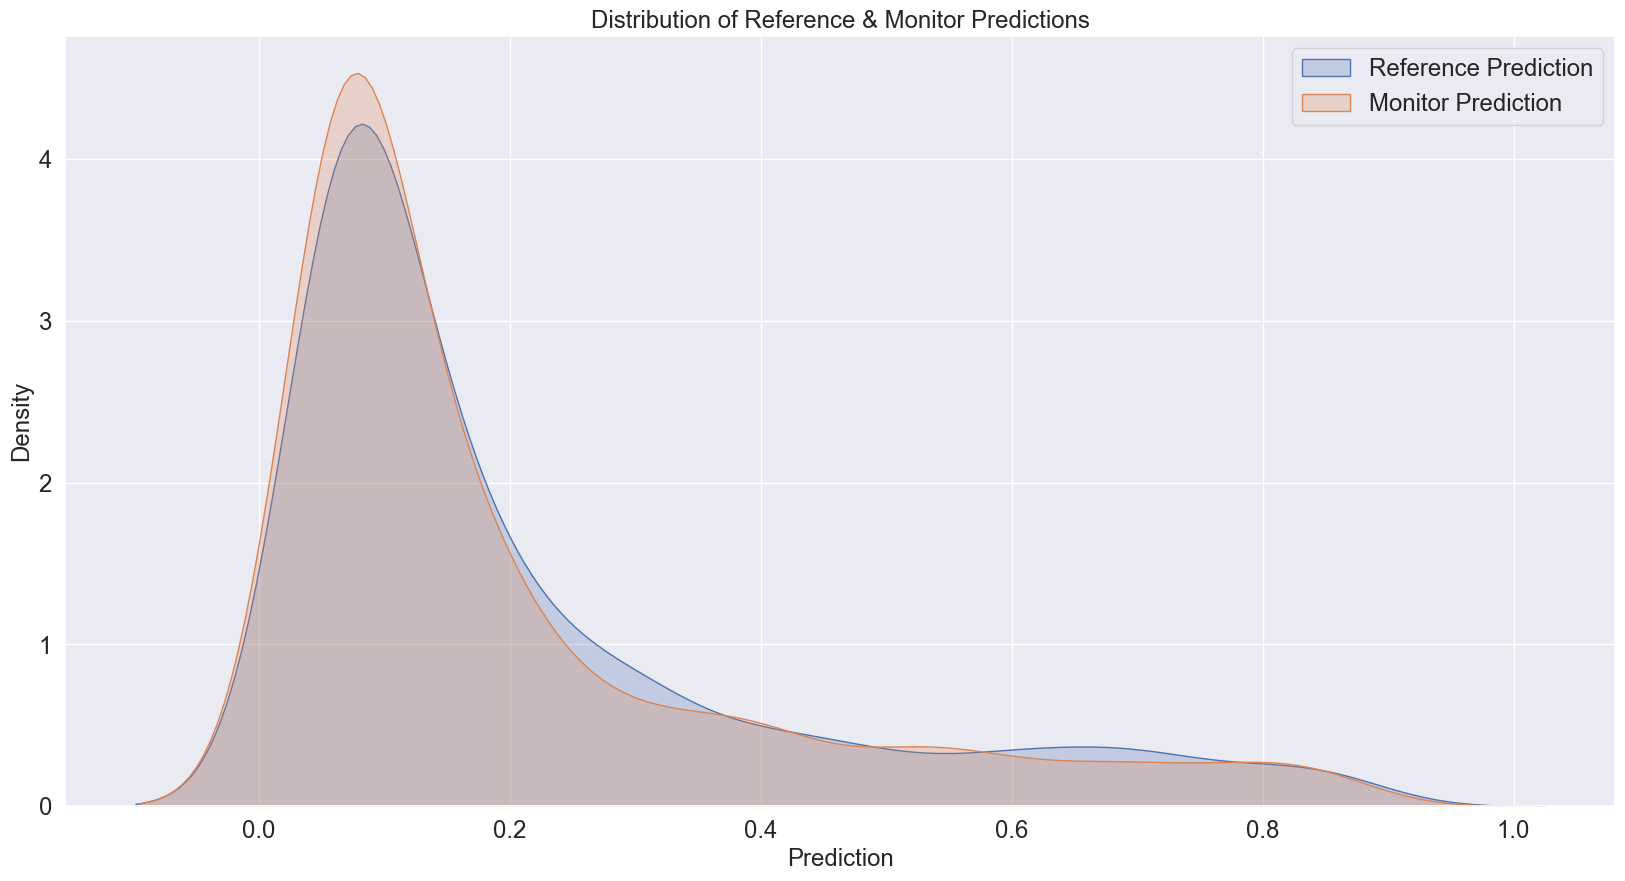

In [17]:
vm.tests.run_test(
    "validmind.ongoing_monitoring.TargetPredictionDistributionPlot",
    inputs={
        "datasets": [vm_reference_ds, vm_monitor_ds],
        "model": vm_model,
    },
    show=False,
).log(section_id="comparison_data_target")

Now we want see difference in correlation pairs between model prediction and features


2024-08-15 14:07:27,235 - INFO(validmind.logging): Sentry failed to initialize - ignoring...


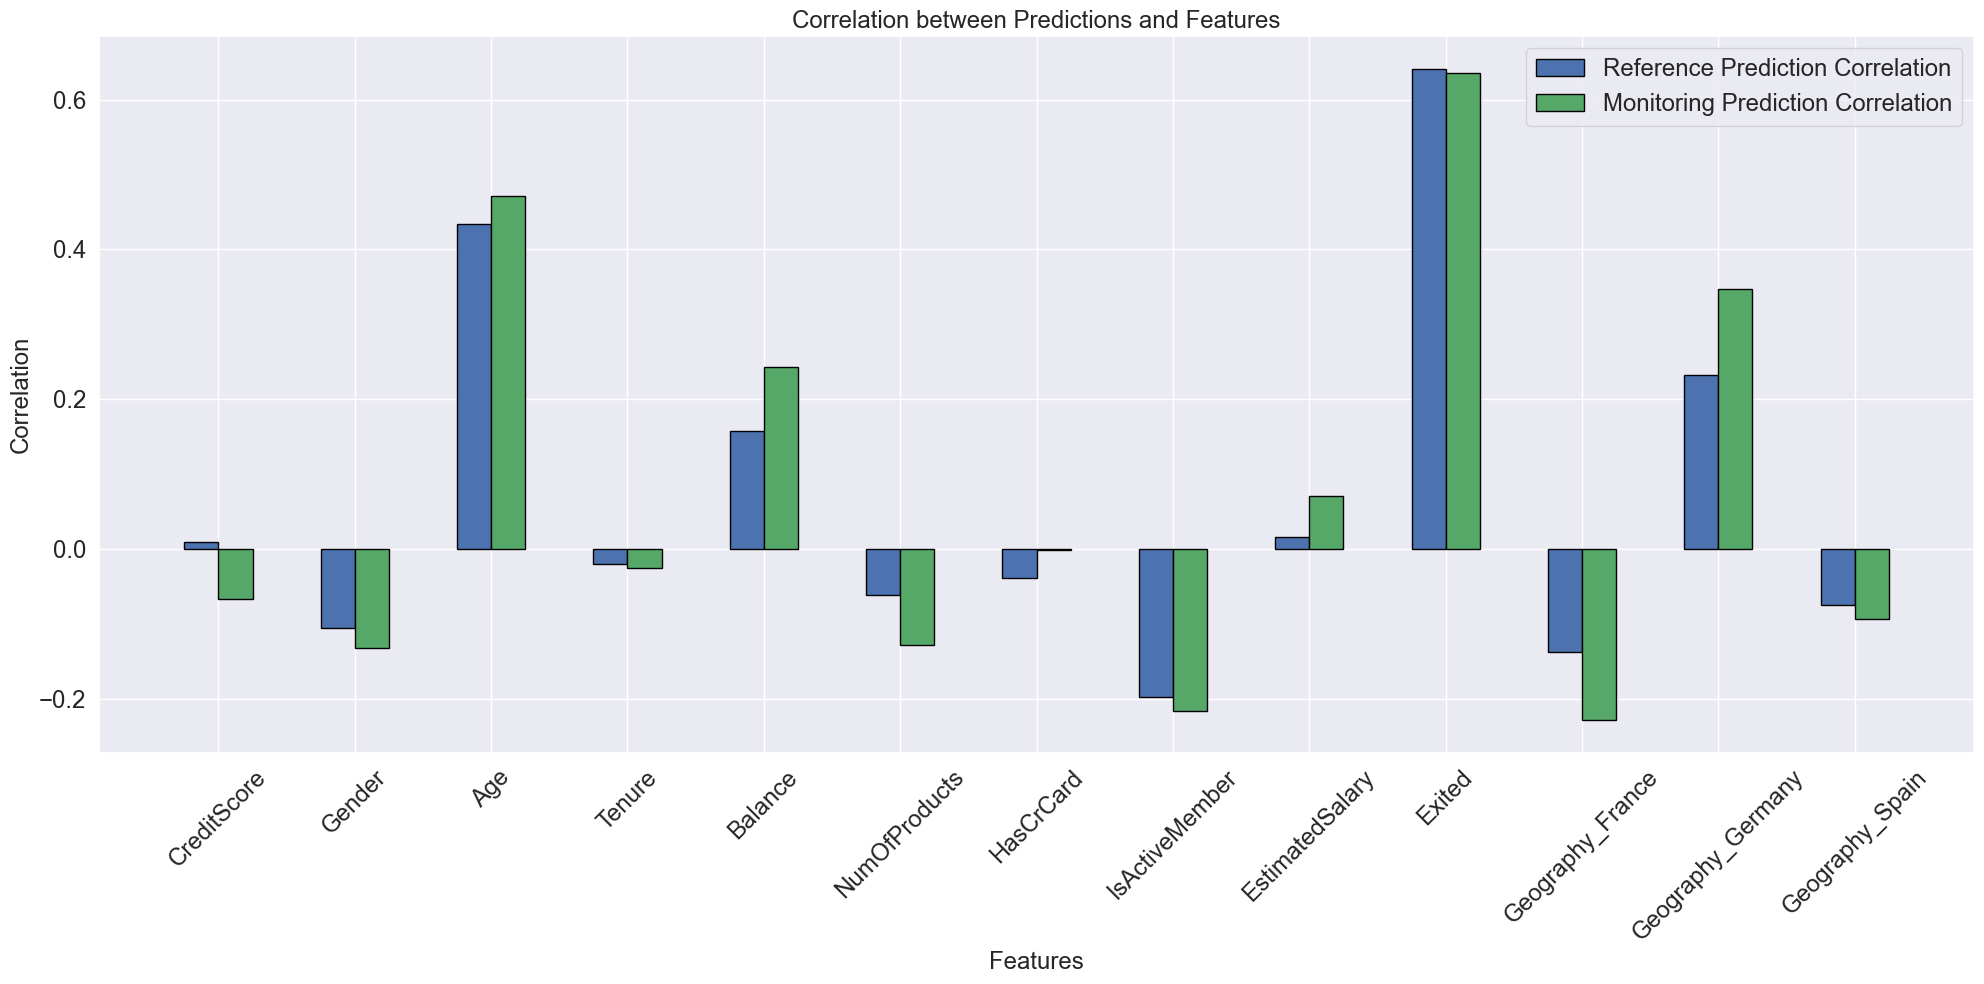

In [18]:
vm.tests.run_test(
    "validmind.ongoing_monitoring.PredictionCorrelation",
    inputs={
        "datasets": [vm_reference_ds, vm_monitor_ds],
        "model": vm_model,
    },
    show=False,
).log(section_id="comparison_data_target")

Finally for target drift, let's plot each prediction value and feature grid side by side


In [19]:
vm.tests.run_test(
    "validmind.ongoing_monitoring.PredictionAcrossEachFeature",
    inputs={
        "datasets": [vm_reference_ds, vm_monitor_ds],
        "model": vm_model,
    },
    show=False,
).log(section_id="comparison_data_target")

2024-08-15 14:07:37,434 - INFO(validmind.logging): Sentry failed to initialize - ignoring...


#### Feature Drift Tests

Next, let's add run a test to investigate how or if the features have drifted. In this instance we want to compare the training data with prediction data. These results will be logged in the **Data Quality & Drift Assessment > Feature Drift** section.

In [20]:
vm.tests.run_test(
    "validmind.ongoing_monitoring.FeatureDrift",
    inputs={
        "datasets": [vm_reference_ds, vm_monitor_ds],
        "model": vm_model,
    },
    show=False,
).log(section_id="comparison_data_feature")

2024-08-15 14:08:02,246 - INFO(validmind.logging): Sentry failed to initialize - ignoring...


### Model performance monitoring tests

Let's wrap up by monitoring the model's performance. Keep in mind that in some cases, it may not be possible to determine accuracy if the ground truth is unavailable. If this is the case, you can skip this test and instead focus on target and feature drift to inform the model owners.

The pre-configured tests for model performance are:

In [21]:
for l in vm.get_test_suite(section="model_performance_monitoring").get_default_config():
    print(l)

validmind.model_validation.sklearn.ConfusionMatrix:train_vs_test
validmind.model_validation.sklearn.ClassifierPerformance:train_vs_test
validmind.model_validation.sklearn.PrecisionRecallCurve:train_vs_test
validmind.model_validation.sklearn.ROCCurve:train_vs_test
validmind.model_validation.sklearn.MinimumAccuracy:train_vs_test
validmind.model_validation.sklearn.MinimumF1Score:train_vs_test
validmind.model_validation.sklearn.MinimumROCAUCScore:train_vs_test
validmind.model_validation.statsmodels.GINITable
validmind.model_validation.sklearn.PermutationFeatureImportance:train_vs_test
validmind.model_validation.sklearn.SHAPGlobalImportance:train_vs_test


The code below will run the tests and log the results into the monitoring document for each of the tests. Note the use of `input_grid` again, which is required for comparison tests:

In [22]:
# Use the reference dataset vs monitoring dataset - the true comparison of accuracy
for test in vm.get_test_suite(
    section="model_performance_monitoring"
).get_default_config():
    if test == "validmind.model_validation.statsmodels.GINITable":
        vm.tests.run_test(
            "validmind.model_validation.statsmodels.GINITable",
            inputs={
                "datasets": [vm_reference_ds, vm_monitor_ds],
                "model": vm_model,
            },
            show=False,
        ).log()
    else:
        vm.tests.run_test(
            test,
            input_grid={
                "dataset": [vm_reference_ds, vm_monitor_ds],
                "model": [vm_model],
            },
            show=False,
        ).log()
    print("Completed test: {0}".format(test))

Completed test: validmind.model_validation.sklearn.ConfusionMatrix:train_vs_test
Completed test: validmind.model_validation.sklearn.ClassifierPerformance:train_vs_test
Completed test: validmind.model_validation.sklearn.PrecisionRecallCurve:train_vs_test
Completed test: validmind.model_validation.sklearn.ROCCurve:train_vs_test
Completed test: validmind.model_validation.sklearn.MinimumAccuracy:train_vs_test
Completed test: validmind.model_validation.sklearn.MinimumF1Score:train_vs_test
Completed test: validmind.model_validation.sklearn.MinimumROCAUCScore:train_vs_test
Completed test: validmind.model_validation.statsmodels.GINITable
Completed test: validmind.model_validation.sklearn.PermutationFeatureImportance:train_vs_test
Completed test: validmind.model_validation.sklearn.SHAPGlobalImportance:train_vs_test


<a id='toc7_'></a>

## Next steps

You can now review all the ongoing monitoring results in the ValidMind platform.

1. From the [**Model Inventory**](https://app.prod.validmind.ai/model-inventory) in the ValidMind Platform UI, go to the model you registered earlier.

2. Click on the **Ongoing Monitoring** section.

What you see is the full draft of your model monitoring documentation in a more easily consumable version. From here, you can make qualitative edits to model monitoring documentation, view guidelines, collaborate with validators, and submit your model monitoring documentation for approval when it's ready.

<a id='toc7_2_'></a>

### Discover more learning resources

We offer many interactive notebooks to help you document models:

- [Run tests & test suites](https://docs.validmind.ai/developer/model-testing/testing-overview.html)
- [Code samples](https://docs.validmind.ai/developer/samples-jupyter-notebooks.html)

Or, visit our [documentation](https://docs.validmind.ai/) to learn more about ValidMind.